# Project


#### For this project we will start by importing the necessary libraries 

In [27]:
#!pip install pyvis

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import bipartite 
import numpy as np

from pyvis.network import Network

In [29]:
#pip install decorator==4.3

##### Now we will import the csv files to start working with the data

In [30]:
#First we need to get the data from the csv file
attributes= pd.read_csv('Data/nodeattribute.csv', delimiter=';')
edgelist= pd.read_csv('Data/edgelist2.csv',delimiter=';')
g_attributes= attributes[attributes['0']=='gene']
d_attributes = attributes[attributes['0']=='disease']


#We need to convert the data frame into a dictionary to use the set_node_attributes 
nodes_attr = attributes.set_index('Id').to_dict(orient='index')
g_nodes_attr = g_attributes.set_index('Id').to_dict(orient='index')
d_nodes_attr= d_attributes.set_index('Id').to_dict(orient='index')

g_nodes= g_attributes['Id'].to_list()
d_nodes=d_attributes['Id'].to_list()
edges= edgelist.values.tolist()


G = nx.Graph()
G.add_nodes_from(g_nodes, bipartite=0)
G.add_nodes_from(d_nodes, bipartite=1 )
nx.set_node_attributes(G, nodes_attr)
G.add_edges_from(edges)

print(G.nodes[1285]['0'])

#bottom_nodes, top_nodes = bipartite.sets(G)

disease


In [31]:
#Checking that the code worked properly
G.nodes()
#G.edges()
#G.nodes[55]["Label"]
#nodes_attr"""

G.nodes[117]['bipartite']

1

In order to start working with the graph we need to make sure it is connected 

In [32]:
print(nx.is_connected(G))
print(nx.is_bipartite(G))


True
False


### Project description
1. Basic network description of your data (what type of network it is, what does it represent, is it real or synthetically generated, etc). In practice, the result of project phase #1 (finding data).

It is a unipartite, undirected and unweighted network that describes the associations between human diseases and human genes, as extracted from the Morbid Map (MM) of the Online Mendelian Inheritance in Man (OMIM) in 2005.

Source : https://github.com/gephi/gephi/wiki/Datasets


2. Basic network statistics of your data (number of nodes, edges, clustering, degree distribution, etc). In practice, the result of project phase #2 (exploratory data analysis)

In [33]:
#Graph properties 
"""
nx.is_directed(G)
nx.is_bipartite(G)
ns.is_weighted(G)

"""

#the number of nodes and egdes
num_nodes = len(G.nodes())
num_genes= len(g_nodes)
num_diseases= len(d_nodes) 
num_edges= len(G.edges())

#Printing the num of nodes and edges
print(f'The number of nodes that are genes is: {num_genes}\nThe number of nodes that are diseases is: {num_diseases}\n---\nThe total number of nodes is: {num_nodes} ')
print(f'\n---\nThe number of edges is: {num_edges}')



The number of nodes that are genes is: 903
The number of nodes that are diseases is: 516
---
The total number of nodes is: 1419 

---
The number of edges is: 2738


In [34]:
def make_df(column2, function, graph):
    df = pd.DataFrame(list(function(graph).items()), columns=['Id', column2])
    df.set_index('Id', inplace=True)

    return df

closeness = make_df('closeness', nx.closeness_centrality, G)
degree_centrality = make_df('degree', nx.degree_centrality, G)

df= degree_centrality.join(closeness, on='Id')
#density 
density = nx.density(G)



### Graph representation

In [35]:
print(nx.is_directed(G))
print(nx.is_bipartite(G))
print(nx.is_weighted(G))
label= nx.get_node_attributes(G,'Label')
classification = nx.get_node_attributes(G,'0')
typeofclassification= nx.get_node_attributes(G,'1')

#classification[1329]
#typeofclassification[1329]

#G.nodes()
#nodes_attr

False
False
False


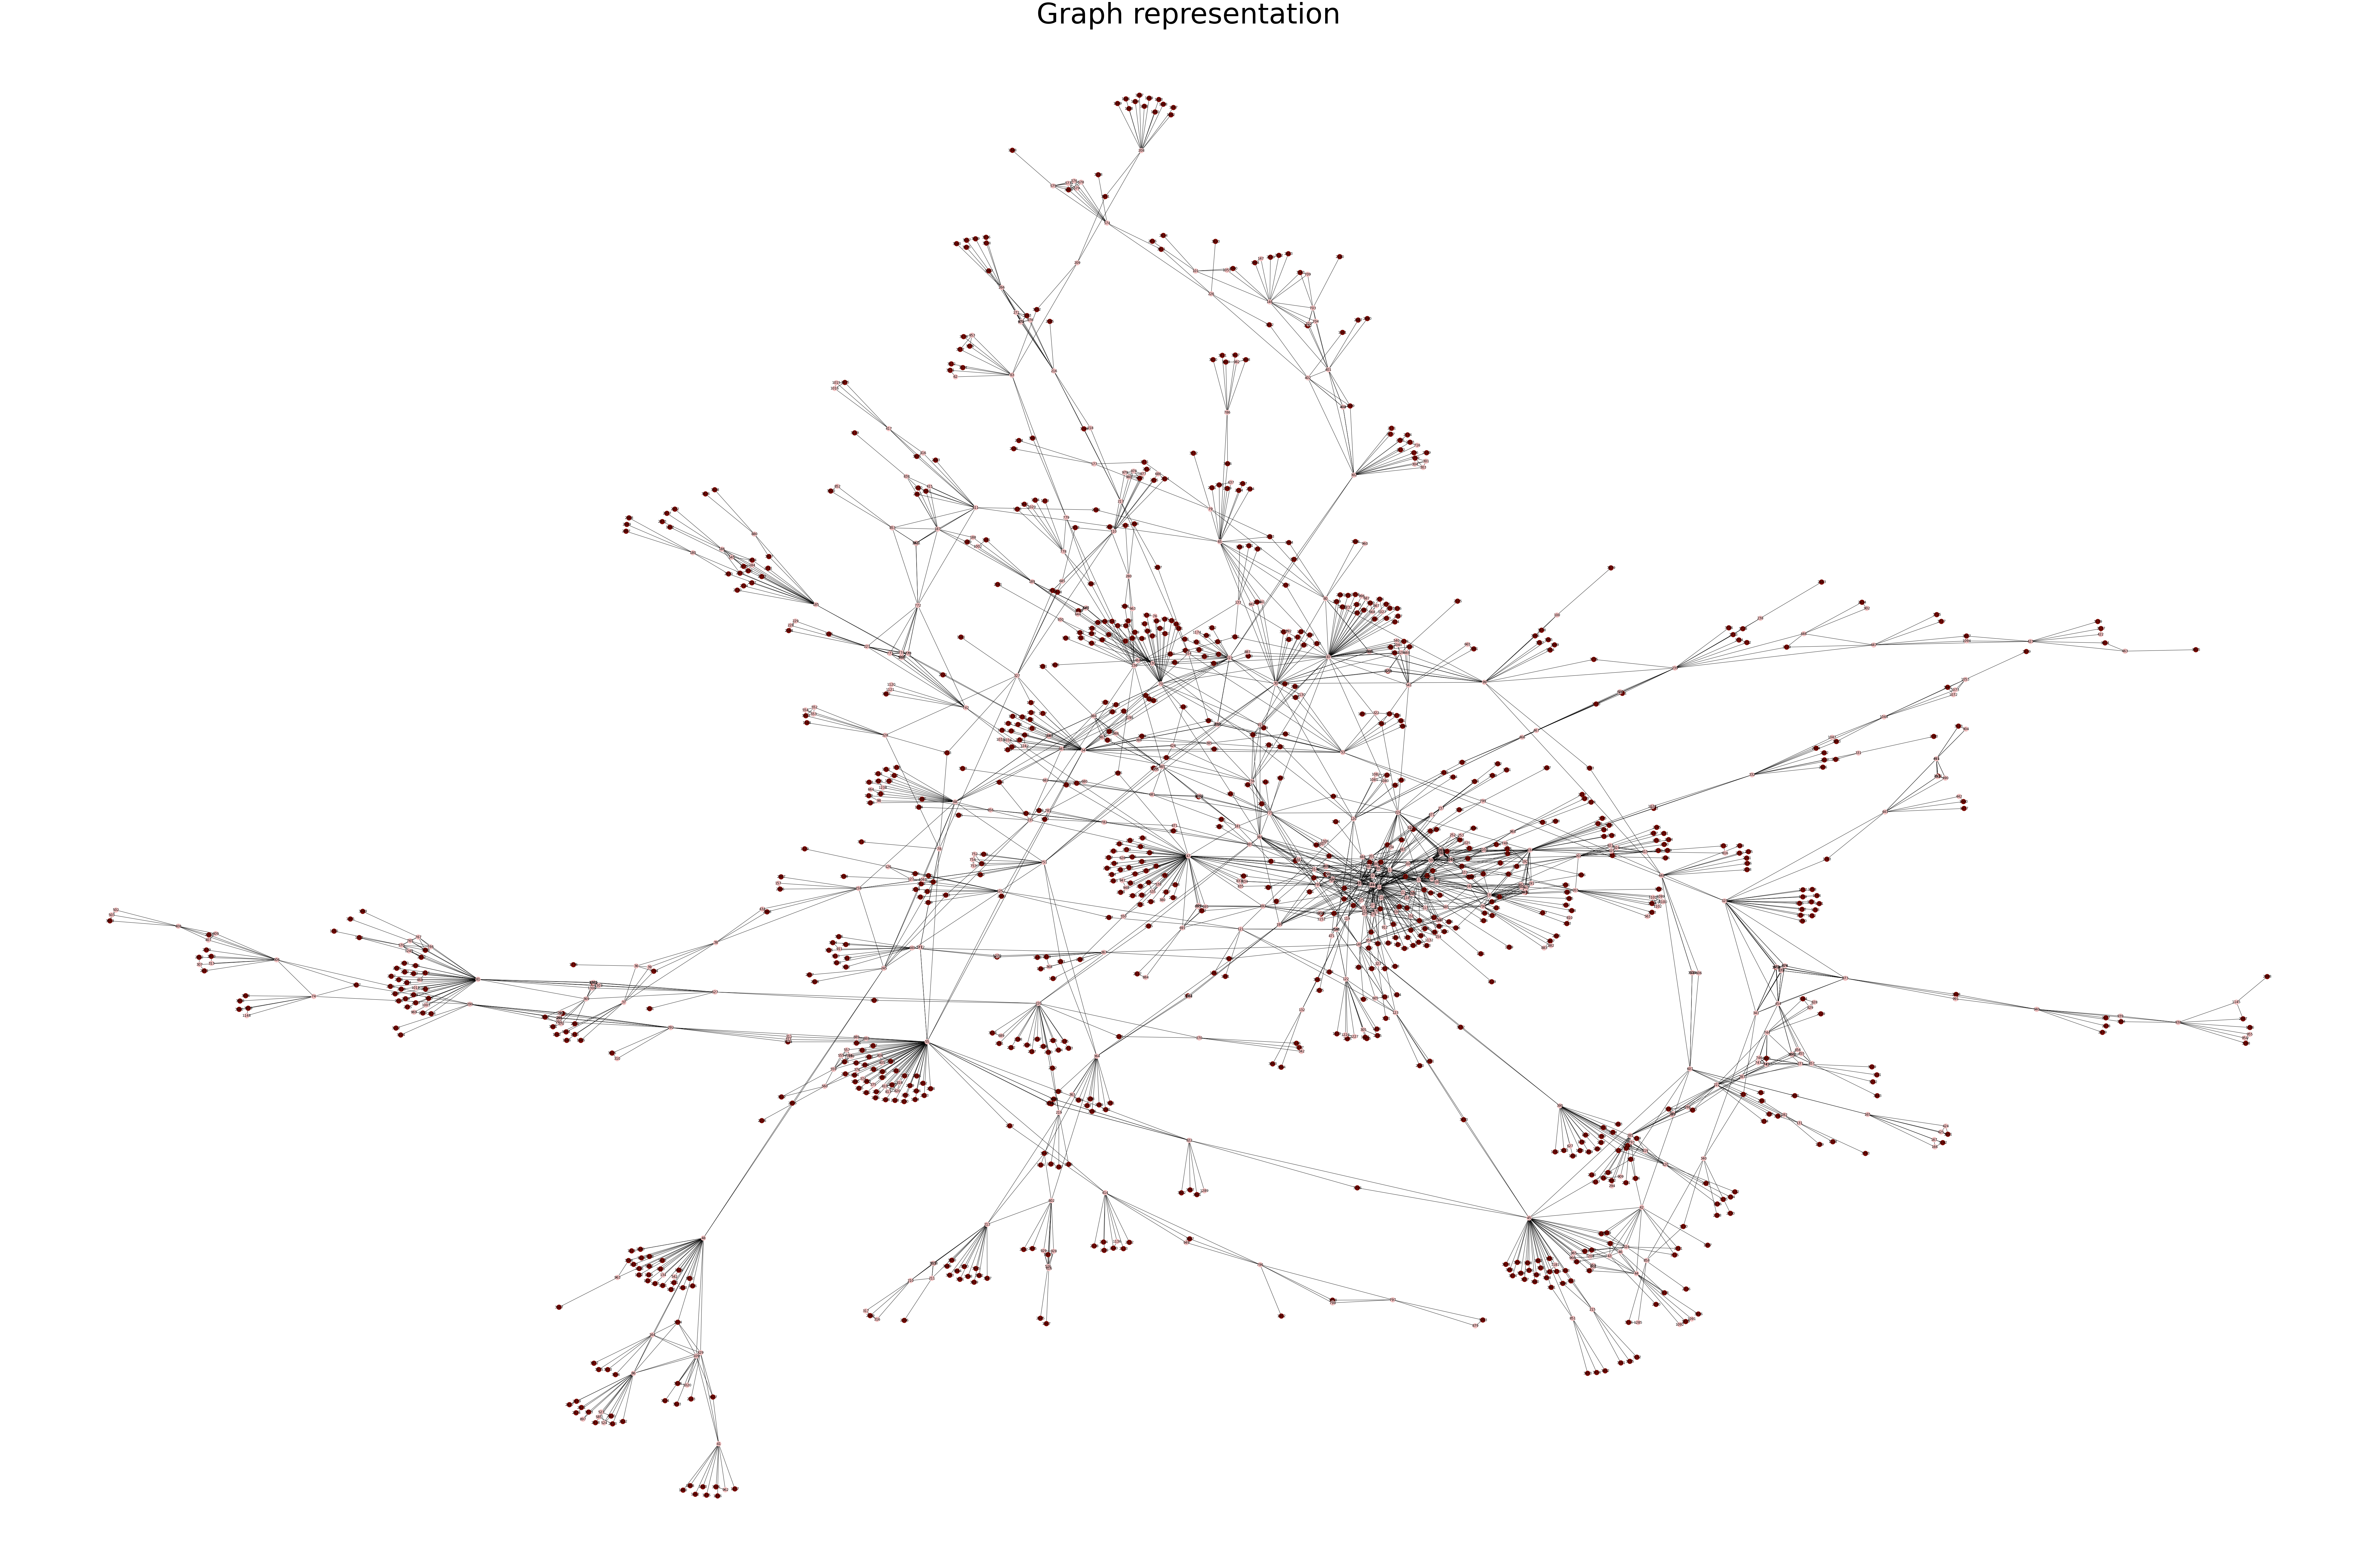

In [36]:
fig, ax = plt.subplots(figsize=(150,100))
color_map = ['#7c0a02' if G.nodes[node]['bipartite'] == 0 else '#f4c2c2' for node in G]

nx.draw(G, node_color = color_map, with_labels = True)

plt.title('Graph representation', fontsize = 100);

# Visualizing the network using Pyvis

In [37]:
trial = attributes.set_index('Id')
n = attributes['Id'].to_list()
t= attributes['Label'].to_list()
l= attributes['0'].to_list()
l1 = attributes['1'].to_list()
attributes['color'] = np.where(attributes['0']== 'disease', '#7c0a02' , '#f4c2c2')
c = attributes['color'].to_list()


net = Network('100vh', '100vw')

net.add_nodes(n, title=l, label=t, color=c)
net.add_edges(edges)
net.show('jk.html')